# **MCO1 - Labor Force Survey 2016**

#### Group: **K-Means Business**

**Dy**, Harmony

**Hernandez**, Christa

**Sanchez**, Matthew

**Uy**, Justine Nicole

## **Section 1. Introduction to the problem/task and dataset**

The dataset the group have chosen is Labor Force Survey 2016. This dataset mainly revolves around the employment and labor force participation of household members in the Philippines, while also capturing key demographic and socio-economic characteristics of the population. The target task is a **classification task** that aims to predict whether or not the respondent has done any work for at least one hour during the past week.

## **Section 2. Description of the dataset**

<b>Description of the Dataset</b>

The Labor Force Survey (LFS), April 2016 data set describes the demographic and socio-economic characteristics of the population mainly through the estimation of levels of employment, unemployment, and underemployment in the 17 administrative regions of the Philippines. It aims to provide a quantitative framework for the preparation of plans and formulation of policies affecting the labor market.

<b> Data Collection </b>

The data collection was conducted face-to-face within a total national sample of 42,768 sample households (rounds with Batanes sample) or 42,576 sample households (rounds without Batanes sample) per survey round (quarterly in a year). This specific data set was collected from April 8, 2016 until April 30, 2016. To ensure the data set had proportional representation among the samples, the PSA designed a master sample which ensures a randomly assigned and selected set of geographic areas with non-overlapping and discernable boundaries known as PSUs. 

As the data collection method utilized a randomized sampling approach, the data collected is well representative of the national and regional statistics. With their systematic survey execution, a high-response rate of 95.7% was achieved which minimizes nonresponse bias.

However, due to the survey only including participants from private households and excluding people from the institutional population, the survey might potentially be underestimating labor force statistics and creating less accurate results.

In [36]:
import pandas as pd
import numpy as np

df = pd.read_csv("PHL-PSA-LFS-2016-Q2-PUF/LFS PUF April 2016.CSV")

display(df.head())
display(df.info())

,PUFREG,PUFPRV,PUFPRRCD,PUFHHNUM,PUFURB2K10,PUFPWGTFIN,PUFSVYMO,PUFSVYYR,PUFPSU,PUFRPL,...,PUFC33_WEEKS,PUFC34_WYNOT,PUFC35_LTLOOKW,PUFC36_AVAIL,PUFC37_WILLING,PUFC38_PREVJOB,PUFC40_POCC,PUFC41_WQTR,PUFC43_QKB,PUFNEWEMPSTAT
0,1,28,2800,1,2,405.2219,4,2016,217,1,...,,,,,,,,1,01,1
1,1,28,2800,1,2,388.8280,4,2016,217,1,...,,,,,,,,1,01,1
2,1,28,2800,1,2,406.1194,4,2016,217,1,...,,,,,,,,1,01,1
3,1,28,2800,2,2,405.2219,4,2016,217,1,...,,,,,,,,1,01,1
4,1,28,2800,2,2,384.3556,4,2016,217,1,...,,,,,,,,1,96,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180862 entries, 0 to 180861
Data columns (total 50 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   PUFREG           180862 non-null  int64  
 1   PUFPRV           180862 non-null  int64  
 2   PUFPRRCD         180862 non-null  int64  
 3   PUFHHNUM         180862 non-null  int64  
 4   PUFURB2K10       180862 non-null  int64  
 5   PUFPWGTFIN       180862 non-null  float64
 6   PUFSVYMO         180862 non-null  int64  
 7   PUFSVYYR         180862 non-null  int64  
 8   PUFPSU           180862 non-null  int64  
 9   PUFRPL           180862 non-null  int64  
 10  PUFHHSIZE        180862 non-null  int64  
 11  PUFC01_LNO       180862 non-null  int64  
 12  PUFC03_REL       180862 non-null  int64  
 13  PUFC04_SEX       180862 non-null  int64  
 14  PUFC05_AGE       180862 non-null  int64  
 15  PUFC06_MSTAT     180862 non-null  object 
 16  PUFC07_GRADE     180862 non-null  obje

None

<b>Row and Column Representation </b>

Each row represents an individual respondent which covers all household members of the sample households that meets their criteria to be considered. Each column represents a feature which describes the demographic and socio-economic chaacteristics of a respondent.

<b>Instances</b>

The data set contains a number of 42,768 instances (corresponding to households including the Batanes sample) or 42,576 instances (corresponding to households excluding the Batanes sample).

<b>Features</b>

There are 50 features in the dataset.

<b>Important Files</b>

LFS PUF April 2016.CSV: Data set file containing instances of the  responses from the survey.

lfs_april_2016_metadata(dictionary).xlsx: A PDF file containing a study description. From this, Coverage, Sampling, Data Collection, and Data Processing were mainly used.

<b>Feature Descriptions</b>

<b>PUFREG</b>: An integer value representing the administartive region where the respondent resides.

<b>PUFPRV</b>: An integer value representing the numerical code of the respondent's province, also called Province Code. 

<b>PUFPRRCD</b>: An integer value representing a recoded verson of the province code, also called Province Recode.

<b>PUFHHNUM</b>: An integer representing a unique identifier for each household.

<b>PUFURB2K10</b>: An integer value of 1 or 2 indicating whether a household is in an urban or rural area based on the FIES 2010 Survey. (No legend provided)

<b>PUFPWGTFIN</b>: A float value corresponding to the final weight factor of each respondent which is used to scale or project survey results to the national level. 

<b>PUFSVYMO</b>: An integer value corresponding to the month the survey was conducted. It is a categorical value which means that 1 corresponds to January, 2 to February and so on.

<b>PUFSVYYR</b>: An integer value corresponding to the year the survey was conducted. All instances are 2016.

<b>PUFPSU</b>: An integer value corresponding to a respondent's Primary Sampling Unit (PSU) identifier.

<b>PUFRPL</b>: An integer value corresponding to a replicate of a responder's Primary Sampling Unit (PSU) identifier.

<b>PUFHHSIZE</b>: An integer value corresponding to the total number of members in a household, also called Household Size.

<b>PUFC01_LNO</b>: An integer value corresponding to a respondent's unique identifier within a household.

<b>PUFC03_REL</b>: An integer value representing the relationship of the respondent to the household head. It is a categorical value which means that 1 corresponds to Head, 2 is Spouse, 3 is Son/Daughter and so on.

<b>PUFC04_SEX</b>: An integer value corresponding to the gender of the respondent. (1 = Male and 2 = Female)

<b>PUFC05_AGE</b>: An integer value corresponding to the respondent's age at the last birthday.

<b>PUFC06_MSTAT</b>: An integer value corresponding to the respondent's marital status. It is a categorical value which means that 1 corresponds to Single, 2 is Married, 3 is Widowed and so on.

<b>PUFC07_GRADE</b>: An integer value corresponding to the highest level of education obtained. It is a categorical value which means that 000 corresponds to No grade completed, 010 is Preschool, 210 is Grade 1 and so on.

<b>PUFC08_CURSCH</b>: An integer value corresponding to whether the respondent is currently attending school. (1 = Yes and 2 = No)

<b>PUFC09_GRADTECH</b>: An integer value corresponding to whether the respondent is a graduate of a technical/vocational course. (1 = Yes and 2 = No)

<b>PUFC10_CONWR</b>: An integer value corresponding to the category of OFW.  It is a categorical value which means that 1 corresponds to OCW, 2 is Workers other than OCW, 3 is Employees in Phil. Embassy, Consulates & other missions and so on.

<b>PUFC11_WORK</b>: An integer value corresponding to whether the respondent do any work for at least one house during the past week. (1 = Yes and 2 = No)

<b>PUFC12_JOB</b>: An integer value corresponding to whether the respondent have a job or business during the past week despite not working last week. (1 = Yes and 2 = No)

<b>PUFC14_PROCC</b>: A integer value representing the respondent's primary occupation during the past week. It is a categorical value. (No legend provided)

<b>PUFC16_PKB</b>: An integer value representing the kind of business or industry the respondent's employed in. It is a categorical value. (No legend provided)

<b>PUFC17_NATEM</b>: An integer value representing the respondent's nature of employment. It is a categorical value which means that 1 corresponds to permanent, 2 is short-term or seasonal, 3 is different employer on day to day or week to week basis.

<b>PUFC18_PNWHRS</b>: An integer value corresponding to the respondent's normal working hours per day. 

<b>PUFC19_PHOURS</b>: An integer value corresponding to the respondent's total number of hours worked during the past week including non-paid hours. 

<b>PUFC20_PWMORE</b>: An integer value representing whether the respondent wants more hours of work during the past week. (1 = Yes and 2 = No)

<b>PUFC21_PLADDW</b>: An integer value representing whether the respondent looked for additional work during the past week. (1 = Yes and 2 = No)

<b>PUFC22_PFWRK</b>: An integer value representing whether it was the first time the respondents worked. (1 = Yes and 2 = No)

<b>PUFC23_PCLASS</b>: An integer value corresponding to the relationship of the respondent to where he works. It is a categorical value which means that 0 corresponds to worked for private household, 1 is worked for private establishment, 2 is worked for government corporation and so on.

<b>PUFC24_PBASIS</b>: An integer value corresponding to the method of payment for the respondent's primary occupation. It is a categorical value which means that 0 corresponds to in kind/imputed, 1 is per piece, 2 is per hour and so on.

<b>PUFC25_PBASIC</b>: An integer value corresponding to the basic pay for normal time of the respondent prior to deductions. 

<b>PUFC26_OJOB</b>: An integer value representing whether or not the respondent has had another job or business during the past week. (1 = Yes and 2 = No)

<b>PUFC27_NJOBS</b>: An integer value corresponding to the total number of jobs held by the respondent during the past week. 

<b>PUFC28_THOURS</b>: An integer value corresponding to the total hours the respondent worked across all jobs during the past week.

<b>PUFC29_WWM48H</b>: An integer value representing the main reason for the respondent working more than 48 hours in the past week. It is a categorical value which means that 1 corresponds to wanted more earnings, 2 is requirements of the job, 3 is exceptional week and so on.  

<b>PUFC30_LOOKW</b>: An integer value indicating whether the respondent look for work or try to establish a business in the past week. (1 = Yes and 2 = No)

<b>PUFC31_FLWRK</b>: An integer value indicating whether the respondent was look for work or try to establish a business for the first time. (1 = Yes and 2 = No)

<b>PUFC32_JOBSM</b>: An integer value representing the respondent's methods to find work. It is a categorical value which means that 1 corresponds to registered in public employment agency, 2 is registered in private employment agency, 3 is approached employer directly and so on.  

<b>PUFC33_WEEKS</b>: An integer value corresponding to the number of weeks the respondent has been looking for work.

<b>PUFC34_WYNOT</b>: An integer value representing the reason the respondent isn't looking for work. It is a categorical value which means that 1 corresponds to Tired/Believed no work available, 2 is Awaiting results of previous job application, 3 is Temporary illness/disability and so on.  

<b>PUFC35_LTLOOKW</b>: An integer value value representing the last time the respondent has looked for work. It is a categorical value which means that 1 corresponds to Within the last month, 2 is One to six months ago, 3 is More than six months ago.  

<b>PUFC36_AVAIL</b>: An integer value indicating whether the respondent would have been available for an opportunity last week or within two weeks. (1 = Yes and 2 = No)

<b>PUFC37_WILLING</b>: An integer value indicating whether the respondent was willing to work in the past week or within 2 weeks. (1 = Yes and 2 = No)

<b>PUFC38_PREVJOB</b>: An integer value indicating whether the respondent has worked before. (1 = Yes and 2 = No)

<b>PUFC40_POCC</b>: An integer value value representing the respondent's last occupation. It is a categorical value. (No legend provided)

<b>PUFC41_WQTR</b>: An integer value indicating whether the respondent has worked at all or business during the past quarter. (1 = Yes and 2 = No)

<b>PUFC43_QKB</b>: An integer value value representing the respondent's kind of business for the past quarter. It is a categorical value. (No legend provided)

<b>PUFNEWEMPSTAT</b>: An integer value value representing the respondent's employment status based on a new classificaion criteria used in the LFS. It is a categorical value. (No legend provided)


## **Section 3. List of requirements**

In [37]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer


## **Section 4. Data preprocessing and cleaning**

It is good practice to first make a copy of the dataframe in order to preserve the original data for any future comparison and analysis.

First, check for any duplicate instances in the dataset in order to be drop any repetitions.

In [38]:
clean_df = df

duplicate_count = clean_df.duplicated().sum()
print(f"Duplicated instances: {duplicate_count}")

Duplicated instances: 0


The output shows no duplicated entries.

Next, we want to find any null values in our dataset. Although upon using `.isnull()` function, it shows that there are no null values in the dataset which is inconsistent when opening the csv file. We came to a realization that some of the values were actually whitespaces due to the nature of the dataset which came from a survey questionnaire.

In [39]:
print(clean_df.isnull().sum())
print((clean_df == ' ').sum()) 

PUFREG             0
PUFPRV             0
PUFPRRCD           0
PUFHHNUM           0
PUFURB2K10         0
PUFPWGTFIN         0
PUFSVYMO           0
PUFSVYYR           0
PUFPSU             0
PUFRPL             0
PUFHHSIZE          0
PUFC01_LNO         0
PUFC03_REL         0
PUFC04_SEX         0
PUFC05_AGE         0
PUFC06_MSTAT       0
PUFC07_GRADE       0
PUFC08_CURSCH      0
PUFC09_GRADTECH    0
PUFC10_CONWR       0
PUFC11_WORK        0
PUFC12_JOB         0
PUFC14_PROCC       0
PUFC16_PKB         0
PUFC17_NATEM       0
PUFC18_PNWHRS      0
PUFC19_PHOURS      0
PUFC20_PWMORE      0
PUFC21_PLADDW      0
PUFC22_PFWRK       0
PUFC23_PCLASS      0
PUFC24_PBASIS      0
PUFC25_PBASIC      0
PUFC26_OJOB        0
PUFC27_NJOBS       0
PUFC28_THOURS      0
PUFC29_WWM48H      0
PUFC30_LOOKW       0
PUFC31_FLWRK       0
PUFC32_JOBSM       0
PUFC33_WEEKS       0
PUFC34_WYNOT       0
PUFC35_LTLOOKW     0
PUFC36_AVAIL       0
PUFC37_WILLING     0
PUFC38_PREVJOB     0
PUFC40_POCC        0
PUFC41_WQTR  

Before we perform further processing for any possible missing values, it's easier to work with them if they are of the same data type. To ensure empty-like data types (whitespaces, tab spaces, newlines, etc) are unified, we will convert them into null values.

In [40]:
clean_df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

print(clean_df.isnull().sum())

#clean_df.to_csv(r"C:\Users\Matthew Sanchez\Desktop\3rdYr\T2\STINTSY\cleaned_LFS_PUF_April_2016.csv", index=False)

PUFREG                  0
PUFPRV                  0
PUFPRRCD                0
PUFHHNUM                0
PUFURB2K10              0
PUFPWGTFIN              0
PUFSVYMO                0
PUFSVYYR                0
PUFPSU                  0
PUFRPL                  0
PUFHHSIZE               0
PUFC01_LNO              0
PUFC03_REL              0
PUFC04_SEX              0
PUFC05_AGE              0
PUFC06_MSTAT        18339
PUFC07_GRADE        18339
PUFC08_CURSCH      107137
PUFC09_GRADTECH     57782
PUFC10_CONWR        57782
PUFC11_WORK         21894
PUFC12_JOB          93306
PUFC14_PROCC       108360
PUFC16_PKB         108360
PUFC17_NATEM       109507
PUFC18_PNWHRS      109507
PUFC19_PHOURS      109507
PUFC20_PWMORE      109507
PUFC21_PLADDW      109507
PUFC22_PFWRK       109507
PUFC23_PCLASS      109507
PUFC24_PBASIS      138947
PUFC25_PBASIC      144274
PUFC26_OJOB        109507
PUFC27_NJOBS       174924
PUFC28_THOURS      109507
PUFC29_WWM48H      163629
PUFC30_LOOKW       132692
PUFC31_FLWRK

Before doing further processes, it is best to determine the relevant features needed for the classification task.

Since the classification task will determine if the household member has done any work for at least an hour over the past week, we wil use Scikit-Learn's feature selection methods to identify the most relevant predictors of `PUFC11_WORK`, focusing on their statistical significance in relation to the label.

In [41]:
# Step 1: Initialize and apply the imputer to fill missing values
imputer = SimpleImputer(strategy="most_frequent")
clean_df[:] = imputer.fit_transform(clean_df)

# Step 2: Define Features (X) and Target (y)
X = clean_df.drop(columns=["PUFC11_WORK"])  # Features
y = clean_df["PUFC11_WORK"]  # label

# Step 3: Perform feature selection (SelectKBest)
selector = SelectKBest(score_func=f_classif, k=15)
X_selected = selector.fit_transform(X, y)

# Step 4: Get selected feature names
selected_features = X.columns[selector.get_support()]
print(selected_features)

# Step 5: Create a DataFrame with only the selected features + target
cleaned_selected_df = clean_df[selected_features.tolist() + ["PUFC11_WORK"]]

display(cleaned_selected_df.isnull().sum())
display(cleaned_selected_df)

c:\Users\JN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [6 7] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\JN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Index(['PUFC01_LNO', 'PUFC03_REL', 'PUFC05_AGE', 'PUFC06_MSTAT',
       'PUFC14_PROCC', 'PUFC16_PKB', 'PUFC17_NATEM', 'PUFC19_PHOURS',
       'PUFC20_PWMORE', 'PUFC21_PLADDW', 'PUFC23_PCLASS', 'PUFC38_PREVJOB',
       'PUFC41_WQTR', 'PUFC43_QKB', 'PUFNEWEMPSTAT'],
      dtype='object')


PUFC01_LNO        0
PUFC03_REL        0
PUFC05_AGE        0
PUFC06_MSTAT      0
PUFC14_PROCC      0
PUFC16_PKB        0
PUFC17_NATEM      0
PUFC19_PHOURS     0
PUFC20_PWMORE     0
PUFC21_PLADDW     0
PUFC23_PCLASS     0
PUFC38_PREVJOB    0
PUFC41_WQTR       0
PUFC43_QKB        0
PUFNEWEMPSTAT     0
PUFC11_WORK       0
dtype: int64

,PUFC01_LNO,PUFC03_REL,PUFC05_AGE,PUFC06_MSTAT,PUFC14_PROCC,PUFC16_PKB,PUFC17_NATEM,PUFC19_PHOURS,PUFC20_PWMORE,PUFC21_PLADDW,PUFC23_PCLASS,PUFC38_PREVJOB,PUFC41_WQTR,PUFC43_QKB,PUFNEWEMPSTAT,PUFC11_WORK
0,1,1,49,2,61,01,1,024,1,1,3,1,1,01,1,1
1,2,2,61,2,92,01,2,008,2,2,6,1,1,01,1,1
2,3,3,19,1,92,01,2,024,1,1,1,1,1,01,1,1
3,1,1,48,2,61,01,1,020,1,1,3,1,1,01,1,1
4,2,2,41,2,91,96,1,072,2,2,0,1,1,96,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180857,1,1,29,2,13,50,1,040,2,2,4,1,1,50,1,1
180858,2,2,29,2,92,01,1,048,2,2,1,2,1,01,3,2
180859,3,3,4,1,92,01,1,048,2,2,1,1,1,01,1,2
180860,4,3,2,1,92,01,1,048,2,2,1,1,1,01,1,2


After imputation, we noticed that soe cells has leading zeroes, we want to remove them for consistent analysis.

In [42]:
numeric_columns = [
    "PUFC01_LNO", "PUFC03_REL", "PUFC05_AGE", "PUFC06_MSTAT",
    "PUFC14_PROCC", "PUFC16_PKB", "PUFC17_NATEM", "PUFC19_PHOURS",
    "PUFC20_PWMORE", "PUFC21_PLADDW", "PUFC23_PCLASS", "PUFC38_PREVJOB",
    "PUFC41_WQTR", "PUFC43_QKB", "PUFNEWEMPSTAT", "PUFC11_WORK"
]

# Convert these columns to integers to remove any leading zeros
cleaned_selected_df[numeric_columns] = cleaned_selected_df[numeric_columns].astype(int)
display(cleaned_selected_df.head())

C:\Users\JN\AppData\Local\Temp\ipykernel_26900\657408775.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_selected_df[numeric_columns] = cleaned_selected_df[numeric_columns].astype(int)


,PUFC01_LNO,PUFC03_REL,PUFC05_AGE,PUFC06_MSTAT,PUFC14_PROCC,PUFC16_PKB,PUFC17_NATEM,PUFC19_PHOURS,PUFC20_PWMORE,PUFC21_PLADDW,PUFC23_PCLASS,PUFC38_PREVJOB,PUFC41_WQTR,PUFC43_QKB,PUFNEWEMPSTAT,PUFC11_WORK
0,1,1,49,2,61,1,1,24,1,1,3,1,1,1,1,1
1,2,2,61,2,92,1,2,8,2,2,6,1,1,1,1,1
2,3,3,19,1,92,1,2,24,1,1,1,1,1,1,1,1
3,1,1,48,2,61,1,1,20,1,1,3,1,1,1,1,1
4,2,2,41,2,91,96,1,72,2,2,0,1,1,96,1,1


## **Section 5. Exploratory data analysis**

This will be the following libraries used for the dataset:

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

To better understand our dataset through visualizations, we will perform exploratory data analysis (EDA). This step allows us to uncover patterns, explore relationships among variables, and identify key insights that will aid in our classification task. Specifically, we aim to analyze employment status `PUFC11_WORK` that indicates whether an individual is employed or unemployed during the past week. A crucial aspect of this analysis is identifying which features may influence employment status, which serves as the label we aim to predict. To start, we will visualize the distribution of employed and unemployed individuals in the past week using a pie chart. This will provide a clear overview of the labor force composition.


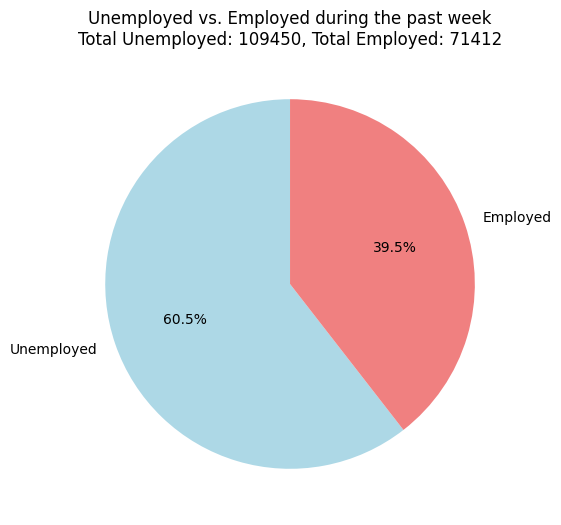

In [44]:
#Pie chart of the Employment status of the household members during the past week
employment_count = cleaned_selected_df["PUFC11_WORK"].value_counts()


plt.figure(figsize=(6, 6))
plt.pie(employment_count, labels=["Unemployed", "Employed"], autopct='%1.1f%%', colors=["lightblue", "lightcoral"], startangle=90)


total_employed = employment_count.get(1, 0)   
total_unemployed = employment_count.get(2, 0)
plt.title(f"Unemployed vs. Employed during the past week\nTotal Unemployed: {total_unemployed}, Total Employed: {total_employed}")


plt.show()

Here we can see that 60.5% of our users are unemployed, while 39.5% of them are employed. With the total count of unemployed people being 109,450 and employed people being 71,412, the pie chart shows that there were more unemployed people than employed ones during the past week with a difference of 38,038. With this in mind, we aim to investigate:
- Which variables influence respondents' inability to do any work in the past week? Alternatively, which variables influence respondents' ability to do or find work in the past week?
- Which variables have little to no correlation with employment for the past week status `PUFC11_WORK` and variables that have significant correleation to it?
- The nature of these relationships

 There are 15 features using scikit-Learn's feature selection methods that was identified to be the most relevant predictors of `PUFC11_WORK`, focusing on their statistical significance in relation to the label. These features divided into the following categories:
- Demographic Information: `PUFC01_LNO`, `PUFC03_REL`, `PUFC05_AGE`, and `PUFC06_MSTAT`
- Employment & Work Characteristics: `PUFC14_PROCC`, `PUFC16_PKB`, `PUFC17_NATEM`, `PUFC19_PHOURS`, `PUFC23_PCLASS`, and `PUFNEWEMPSTAT`
- Job-Seeking & Work Availability: `PUFC20_PWMORE` and `PUFC21_PLADDW`
- Work History & Previous Employment: `PUFC38_PREVJOB`, `PUFC41_WQTR`, and `PUFC43_QKB` 

As `PUFC01_LNO` is a unique identifier for each respondent within a household it will not be analyzed. It is simply a label used to distinguish individuals within a household. For demographic information, the following features will be considered and analyzed `PUFC11_WORK`:
- `PUFC03_REL`: An integer value representing the relationship of the respondent to the household head. It is a categorical value which means that 1 corresponds to Head, 2 is Spouse, 3 is Son/Daughter, 4 is Brother/sister, 5 is Son-in-law/daughter-in-law/6 is grandson/gradndaugter, 7 is father/mother, 8 is other realteive, 9 is boarder, 10 is domestic helper, and 11 is non-relative.
- `PUFC05_AGE`: An integer value corresponding to the respondent's age at the last birthday.
- `PUFC06_MSTAT`: An integer value corresponding to the respondent's marital status. It is a categorical value which means that 1 corresponds to Single, 2 is Marries, 3 is Widowed, 4 is Divorced/Separated, 5 is Annulled, and 6 is Unknown.

C:\Users\JN\AppData\Local\Temp\ipykernel_26900\2507246894.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cleaned_selected_df, x='PUFC11_WORK', y='PUFC05_AGE', palette='coolwarm', ax=axes[1])
C:\Users\JN\AppData\Local\Temp\ipykernel_26900\2507246894.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(["No (2)", "Yes (1)"])


[Text(0, 0, 'No (2)'), Text(1, 0, 'Yes (1)')]

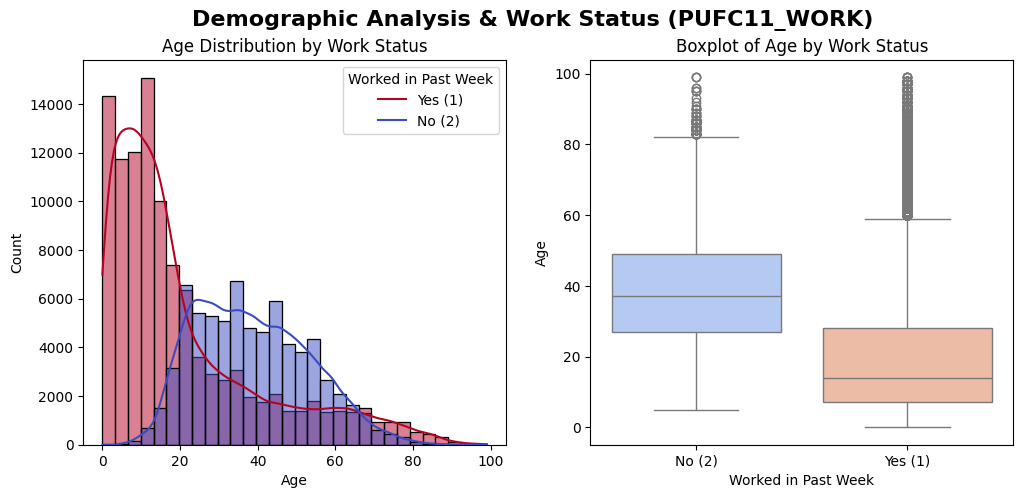

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Demographic Analysis & Work Status (PUFC11_WORK)", fontsize=16, fontweight='bold')

#Age Distribution - Histogram 
sns.histplot(cleaned_selected_df, x='PUFC05_AGE', hue='PUFC11_WORK', kde=True, bins=30, palette='coolwarm', ax=axes[0])
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Count")
axes[0].set_title("Age Distribution by Work Status")
axes[0].legend(title="Worked in Past Week", labels=["Yes (1)", "No (2)"])

#Age & Work Status during the past week - Boxplot 
sns.boxplot(data=cleaned_selected_df, x='PUFC11_WORK', y='PUFC05_AGE', palette='coolwarm', ax=axes[1])
axes[1].set_xlabel("Worked in Past Week")
axes[1].set_ylabel("Age")
axes[1].set_title("Boxplot of Age by Work Status")
axes[1].set_xticklabels(["No (2)", "Yes (1)"])

With `PUFC05_AGE` being a continuous numerical data type, a histogram with a kernel density estimate (KDE) and boxplot was used. The two visualizations we see above in the first row covers the relationship between `PUFC05_AGE` and `PUFC11_WORK`. The histrogram indicates a high number of people under the age 20 to have worked in the past week while those that did not work in the past week is spread out over a wider age range, with a significant portion at older ages (20-60). As for the boxplot, the median age of those who have worked in the past week also show that they are relatively younger. The working group has a more compact age range, with fewer older individuals, reinforcing the idea that employment is highest among younger-aged individuals. Meanwhile the non-working group has a wider spread, with many older individuals and potential outliers above 80 years. Meaning that older adults are more likely to be retired, unemployed, or not seeking work. The KDE shows a steady presence of middle-aged and elderly individuals in the non-working group, reinforcing this idea.

C:\Users\JN\AppData\Local\Temp\ipykernel_26900\429463914.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels([relationship_labels[i] for i in top_relationships], rotation=45)
C:\Users\JN\AppData\Local\Temp\ipykernel_26900\429463914.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels([marital_status_labels[i] for i in cleaned_selected_df['PUFC06_MSTAT'].unique()], rotation=45)


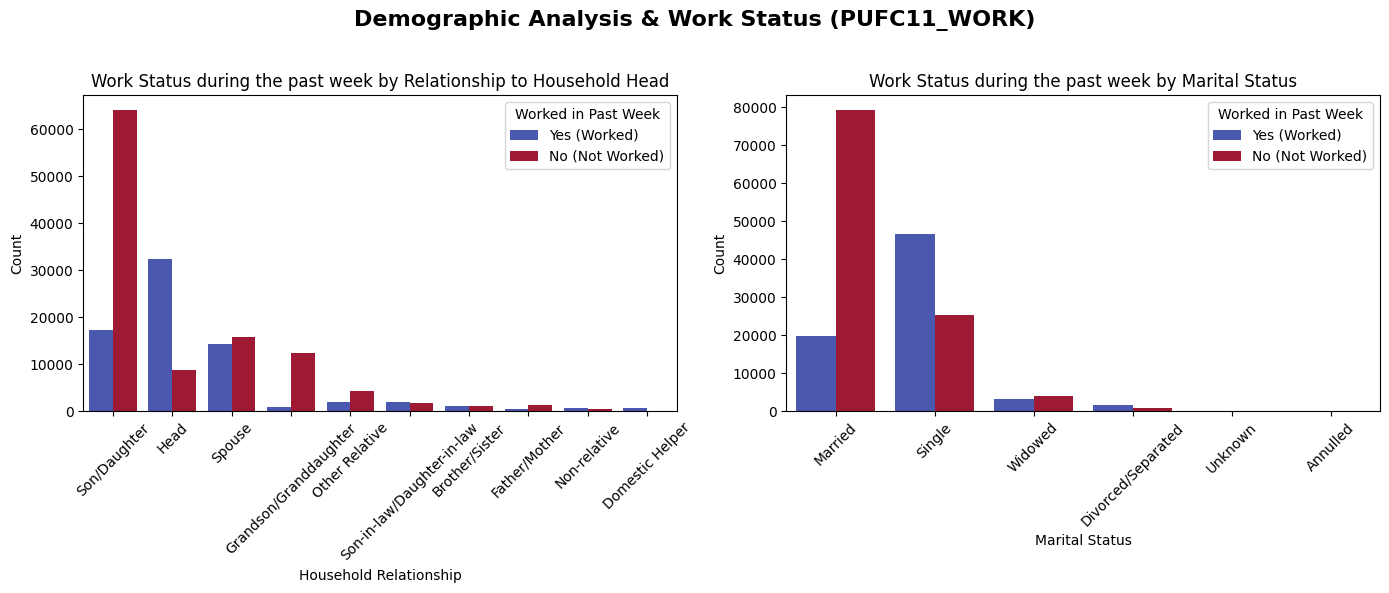

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Demographic Analysis & Work Status (PUFC11_WORK)", fontsize=16, fontweight='bold')

# Define category labels
relationship_labels = {
    1: "Head", 2: "Spouse", 3: "Son/Daughter", 4: "Brother/Sister", 5: "Son-in-law/Daughter-in-law",
    6: "Grandson/Granddaughter", 7: "Father/Mother", 8: "Other Relative", 9: "Boarder",
    10: "Domestic Helper", 11: "Non-relative"
}

marital_status_labels = {
    1: "Single", 2: "Married", 3: "Widowed", 4: "Divorced/Separated", 5: "Annulled", 6: "Unknown"
}

work_status_labels = {1: "Yes (Worked)", 2: "No (Not Worked)"}

# Relationship to Household Head - Count Plot
top_relationships = cleaned_selected_df['PUFC03_REL'].value_counts().nlargest(10).index  # Top 10 categories
filtered_df = cleaned_selected_df[cleaned_selected_df['PUFC03_REL'].isin(top_relationships)]  # Filter dataset

sns.countplot(
    data=filtered_df, x='PUFC03_REL', hue='PUFC11_WORK', palette='coolwarm',
    order=top_relationships, ax=axes[0]
)
axes[0].set_xlabel("Household Relationship")
axes[0].set_ylabel("Count")
axes[0].set_title("Work Status during the past week by Relationship to Household Head")
axes[0].set_xticklabels([relationship_labels[i] for i in top_relationships], rotation=45)
axes[0].legend(title="Worked in Past Week", labels=[work_status_labels[1], work_status_labels[2]])

# Marital Status - Count Plot
sns.countplot(
    data=cleaned_selected_df, x='PUFC06_MSTAT', hue='PUFC11_WORK',
    palette='coolwarm', ax=axes[1]
)
axes[1].set_xlabel("Marital Status")
axes[1].set_ylabel("Count")
axes[1].set_title("Work Status during the past week by Marital Status")
axes[1].set_xticklabels([marital_status_labels[i] for i in cleaned_selected_df['PUFC06_MSTAT'].unique()], rotation=45)
axes[1].legend(title="Worked in Past Week", labels=[work_status_labels[1], work_status_labels[2]])

plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

With `PUFC03_REL` arranged by total count (both those who worked and did not work in the past week) from highest to lowest, the Son/Daughter category had the largest number of individuals who did not work, while the Head category had the highest count of individuals who were employed. This highlights a significant proportion of dependents within households, likely consisting of students or young adults not yet in the workforce. In contrast, household heads are predominantly the primary earners.

For `PUFC06_MSTAT`, the countplot reveals that married individuals are more likely to be unemployed, as indicated by the higher number of red bars, whereas single individuals have a greater proportion of those who worked (blue bars). This could suggest that single individuals may have fewer household responsibilities or may be earlier in their careers, increasing their workforce participation.

Next, let us dive in to the employment & work characteristics category: `PUFC14_PROCC`, `PUFC16_PKB`, `PUFC17_NATEM`, `PUFC19_PHOURS`, `PUFC23_PCLASS`, and `PUFNEWEMPSTAT` and how it correlates to `PUFC11_WORK`.
- `PUFC14_PROCC`: A integer value representing the respondent's primary occupation during the past week. It is a categorical value. 
- `PUFC16_PKB` : An integer value representing the kind of business or industry the respondent's employed in. It is a categorical value. 
- `PUFC17_NATEM`: An integer value representing the respondent's nature of employment. It is a categorical value which means that 1 corresponds to permanent, 2 is short-term or seasonal, 3 is different employer on day to day or week to week basis.
- `PUFC19_PHOURS`: An integer value corresponding to the respondent's total number of hours worked during the past week including non-paid hours.
- `PUFC23_PCLASS`: An integer value corresponding to the relationship of the respondent to where he works. It is a categorical value which means that 0 corresponds to worked for private household, 1 is worked for private establishment, 2 is worked for government corporation, 3 is Self-employed without any paid employee, 4 is Employer in own family-operated farm or business, 5 is worked with pay in own familyoperated farm or business, 6 is worked without pay in own familyoperated farm or business
- `PUFNEWEMPSTAT`: An integer value value representing the respondent's employment status based on a new classificaion criteria used in the LFS. It is a categorical value. (No legend provided)

PUFC11_WORK                                         Yes (1)  No (2)
PUFC14_PROCC                                                       
Agricultural, forestry & fishery laborers             10077  108509
Building & related trades workers (excl. electr...     2491      33
Cleaners and helpers                                   3033      15
Drivers & mobile plant operators                       2799      24
Hospitality, retail & other services managers          6756      66
Laborers in mining, construction, manufacturing...     5353      37
Market-oriented skilled agricultural workers           8336     179
Personal service workers                               2763      30
Production & specialized services managers             3916      52
Sales workers                                          5703      41


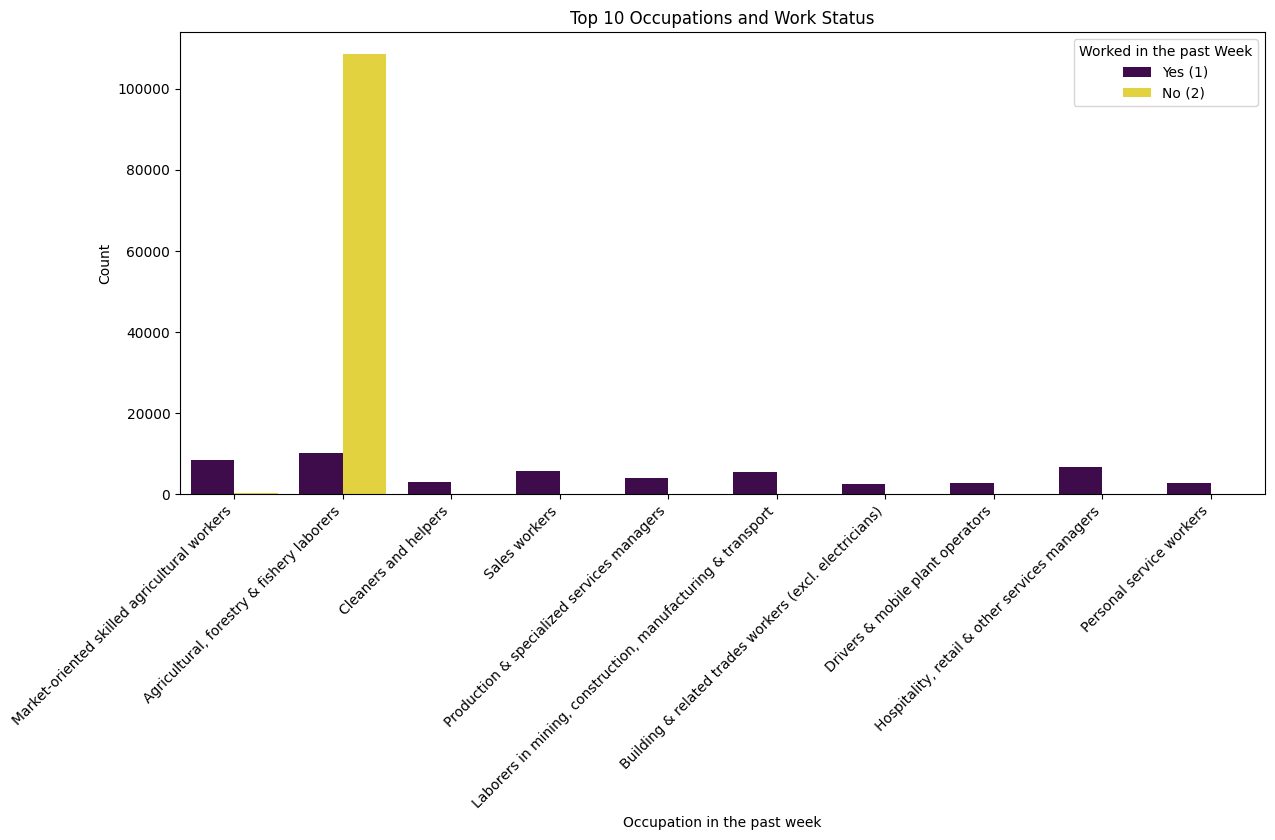

In [47]:
occupation_names = {
    92: "Agricultural, forestry & fishery laborers",
    61: "Market-oriented skilled agricultural workers",
    91: "Cleaners and helpers",
    52: "Sales workers",
    13: "Production & specialized services managers",
    93: "Laborers in mining, construction, manufacturing & transport",
    71: "Building & related trades workers (excl. electricians)",
    83: "Drivers & mobile plant operators",
    14: "Hospitality, retail & other services managers",
    51: "Personal service workers"
}

# Get the top 10 most largest respodnents occupations
top_10_procc = cleaned_selected_df['PUFC14_PROCC'].value_counts().nlargest(10).index
df_top_procc = cleaned_selected_df[cleaned_selected_df['PUFC14_PROCC'].isin(top_10_procc)].copy()

df_top_procc['PUFC14_PROCC'] = df_top_procc['PUFC14_PROCC'].map(occupation_names)
work_status_counts = df_top_procc.groupby('PUFC14_PROCC')['PUFC11_WORK'].value_counts().unstack().fillna(0)
work_status_counts = work_status_counts.rename(columns={1: "Yes (1)", 2: "No (2)"})
print(work_status_counts)


plt.figure(figsize=(14, 6))
sns.countplot(data=df_top_procc, x="PUFC14_PROCC", hue="PUFC11_WORK", palette="viridis")
plt.title("Top 10 Occupations and Work Status")
plt.xlabel("Occupation in the past week")
plt.ylabel("Count")

plt.legend(title="Worked in the past Week", labels=["Yes (1)", "No (2)"])
plt.xticks(rotation=45, ha="right")
plt.show()



`PUFC14_PROCC` was arranged to listing the top 10 respondent's occupation in the past week, as seen in the countplot. Here we can see that out of the 10 occupations, agricultural, forestry and fishery laborers had the highest employed and unemployed respondents during the past week. Those that have worked in the past week seems to be distributed more evenly across the occupations - agricultural, forestry and fishery laborers as the highest with 10077, Market-oriented skilled agricultural workers with 8336, and so on. However a massive difference of those that did not work in the past week were those with the occupation of agricultural, forestry and fishery laborers totaling 108509 which is a hundred thousands more than the other occupations. This may suggest that agriculture-related jobs may be particularly vulnerable to work disruptions (perhaps due to seasonal work, economic conditions, or environmental factors like weather).


Work Status by Industry:
                            Working (Yes)  Not Working (No)
PUFC16_PKB                                                
Agriculture                        17666            108689
Construction of Buildings           4727                51
Land Transport                      4427                36
Public Administration               4232                69
Retail Trade                       12232                85

Work Status by Nature of Employment:
                       Working (Yes)  Not Working (No)
PUFC17_NATEM                                         
Permanent                     54092            109301
Short-term/Seasonal           14804               125
Irregular (Gig Work)           2516                24


C:\Users\JN\AppData\Local\Temp\ipykernel_26900\3382177052.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)


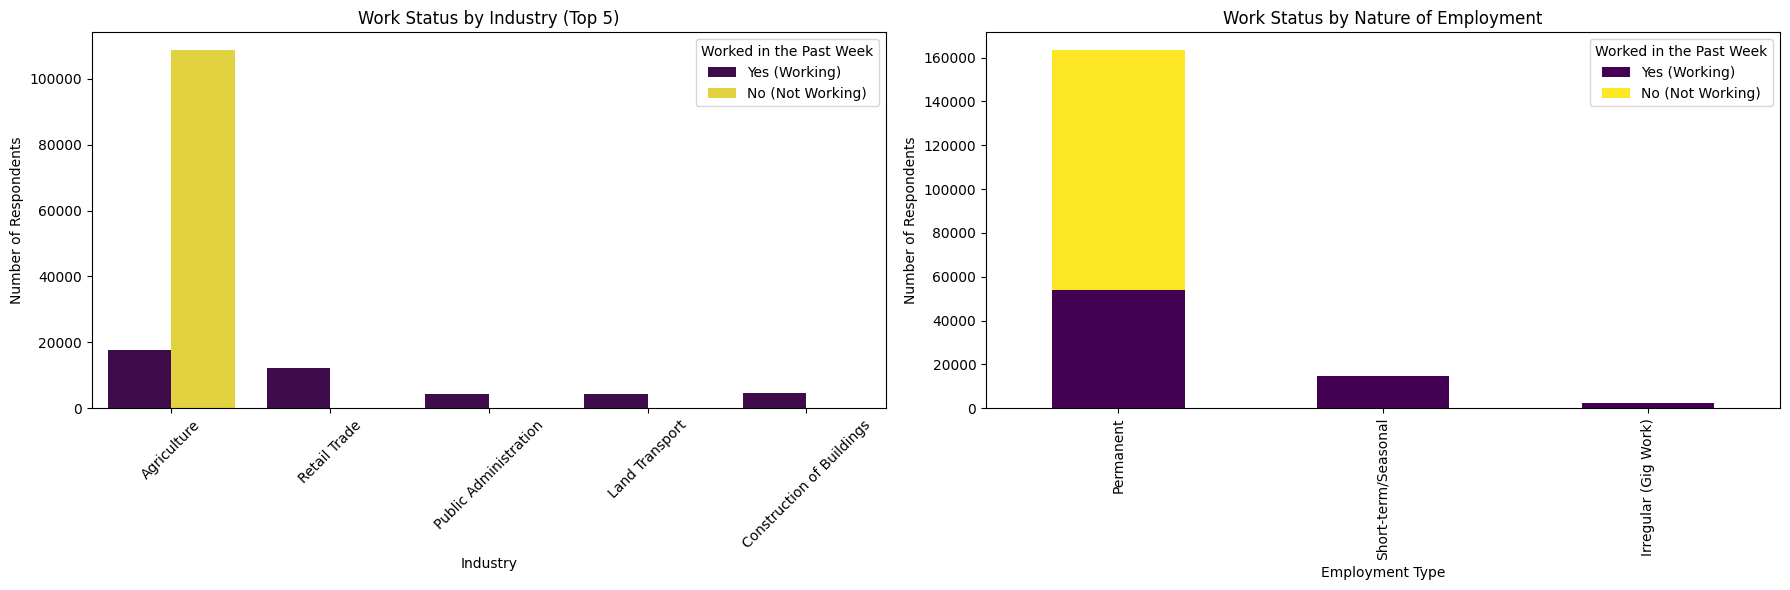


Chi-Square Test (Industry vs Work Status): χ²=76368.79, p=0.00000
Chi-Square Test (Nature of Employment vs Work Status): χ²=28806.95, p=0.00000


In [48]:
industry_labels = {
    1: "Agriculture",
    3: "Agriculture",
    41: "Construction of Buildings",
    47: "Retail Trade",
    49: "Land Transport",
    84: "Public Administration"
}

# Get top 5 industries
top_5_industries = cleaned_selected_df['PUFC16_PKB'].value_counts().nlargest(5).index
df_top_industry = cleaned_selected_df[cleaned_selected_df['PUFC16_PKB'].isin(top_5_industries)].copy()
df_top_industry['PUFC16_PKB'] = df_top_industry['PUFC16_PKB'].map(industry_labels)

# Count work status (1 = Working, 2 = Not Working) by industry
industry_work_counts = df_top_industry.groupby('PUFC16_PKB')['PUFC11_WORK'].value_counts().unstack().fillna(0)
industry_work_counts = industry_work_counts[[1, 2]]  # Ensure order: Working (Yes) first
industry_work_counts.columns = ['Working (Yes)', 'Not Working (No)']

# Count work status by nature of employment (1 = Permanent, 2 = Short-term, 3 = Irregular)
nature_work_counts = cleaned_selected_df.groupby('PUFC17_NATEM')['PUFC11_WORK'].value_counts().unstack().fillna(0)
nature_work_counts = nature_work_counts[[1, 2]]  # Ensure order: Working (Yes) first
nature_work_counts.columns = ['Working (Yes)', 'Not Working (No)']
nature_labels = {1: "Permanent", 2: "Short-term/Seasonal", 3: "Irregular (Gig Work)"}
nature_work_counts.index = nature_work_counts.index.map(nature_labels)

# Display numerical summaries
print("Work Status by Industry:\n", industry_work_counts)
print("\nWork Status by Nature of Employment:\n", nature_work_counts)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Countplot for Top 5 Industries vs Work Status
sns.countplot(data=df_top_industry, x="PUFC16_PKB", hue="PUFC11_WORK", palette="viridis", ax=axes[0])
axes[0].set_title("Work Status by Industry (Top 5)")
axes[0].set_xlabel("Industry")
axes[0].set_ylabel("Number of Respondents")
axes[0].legend(title="Worked in the Past Week", labels=["Yes (Working)", "No (Not Working)"])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Stacked Bar Chart for Nature of Employment vs Work Status
nature_work_counts.plot(kind='bar', stacked=True, colormap="viridis", ax=axes[1])
axes[1].set_title("Work Status by Nature of Employment")
axes[1].set_xlabel("Employment Type")
axes[1].set_ylabel("Number of Respondents")
axes[1].legend(title="Worked in the Past Week", labels=["Yes (Working)", "No (Not Working)"])

plt.tight_layout()
plt.show()

# Chi-Square Test to check significance of relationships
chi2_industry, p_industry, _, _ = chi2_contingency(industry_work_counts)
chi2_nature, p_nature, _, _ = chi2_contingency(nature_work_counts)

print(f"\nChi-Square Test (Industry vs Work Status): χ²={chi2_industry:.2f}, p={p_industry:.5f}")
print(f"Chi-Square Test (Nature of Employment vs Work Status): χ²={chi2_nature:.2f}, p={p_nature:.5f}")


Following that `PUFC16_PKB` and `PUFC17_NATEM` also fall under cateogrical data types a countplot and stacked bar chart were used. In accordance to agricultural-related laboreres being the highest occupation of employed and unemplyoed respodnents during the last week, the countplot of `PUFC16_PKB` shows the Agriculture industry being the highest kind of business that respondents are employed in. As for the stacked bar chart of `PUFC17_NATEM` permanent jobs have the largest number of workers (54,092), but a massive portion (109,301) is not working in the past week. We then used the Chi-Square test for Industry vs. Work Status & Nature of Employment vs. Work Status during the past week to determine whether there is a significant association between two categorical variables. With the X^2 of the two being a large number, we can determine that `PUFC16_PKB` and `PUFC17_NATEM` have a strong association with `PUFC11_WORK`. Additionally with a A p-value of 0.00000 (or < 0.05), it tells us that industry and employment type strongly influence work status, meaning policies and economic conditions affecting certain industries or employment types can have major effects on job availability.


Employment Status Count (Employed Only):
 PUFC11_WORK
1    71412
Name: count, dtype: int64

Summary Statistics of Hours Worked (Employed Only):
count    71412.000000
mean        41.485227
std         18.876313
min          0.000000
25%         30.000000
50%         42.000000
75%         48.000000
max        112.000000
Name: PUFC19_PHOURS, dtype: float64


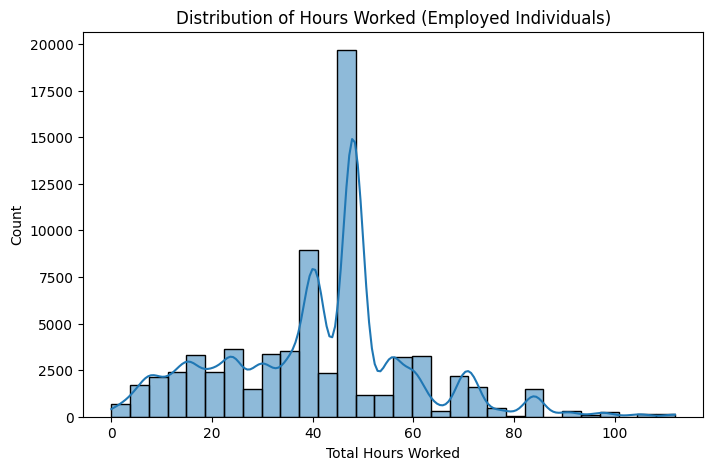

In [67]:
# Filter only employed individuals (PUFC11_WORK == 1)
employed_df = cleaned_selected_df[cleaned_selected_df['PUFC11_WORK'] == 1]

# Count of employed individuals
work_counts = employed_df['PUFC11_WORK'].value_counts()
print("Employment Status Count (Employed Only):\n", work_counts)

# Summary statistics for PUFC19_PHOURS (only employed)
print("\nSummary Statistics of Hours Worked (Employed Only):")
print(employed_df['PUFC19_PHOURS'].describe())

# Histogram of Hours Worked (Only Employed)
plt.figure(figsize=(8, 5))
sns.histplot(employed_df['PUFC19_PHOURS'], bins=30, kde=True)
plt.title("Distribution of Hours Worked (Employed Individuals)")
plt.xlabel("Total Hours Worked")
plt.ylabel("Count")
plt.show()



With `PUFC19_PHOURS` accounting for the total hours worked in the past week, those that did not work in the past week `PUFC11_WORK`'s (No=2) will not be accounted for. The average weekly hours worked is 41.49, with a median of 42, closely aligning with a full-time schedule.However, the distribution also shows a notable spread, with a standard deviation of 18.88 hours, suggesting considerable variation in working hours across different individuals. The histogram peaks at around 40 hours, with secondary peaks at 20 and 60+ hours, likely reflecting part-time and overtime workers. Some report 0 hours despite being employed, possibly due to temporary leave. The maximum of 112 hours suggests extreme workloads in high-demand professions.

C:\Users\JN\AppData\Local\Temp\ipykernel_26900\1624245681.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_selected_df['PUFC23_PCLASS'] = cleaned_selected_df['PUFC23_PCLASS'].map(pclass_labels)
C:\Users\JN\AppData\Local\Temp\ipykernel_26900\1624245681.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_selected_df['PUFNEWEMPSTAT'] = cleaned_selected_df['PUFNEWEMPSTAT'].map(empstat_labels)
C:\Users\JN\AppData\Local\Temp\ipykernel_26900\1624245681.py:24: SettingWithCopyWarning: 
A value i

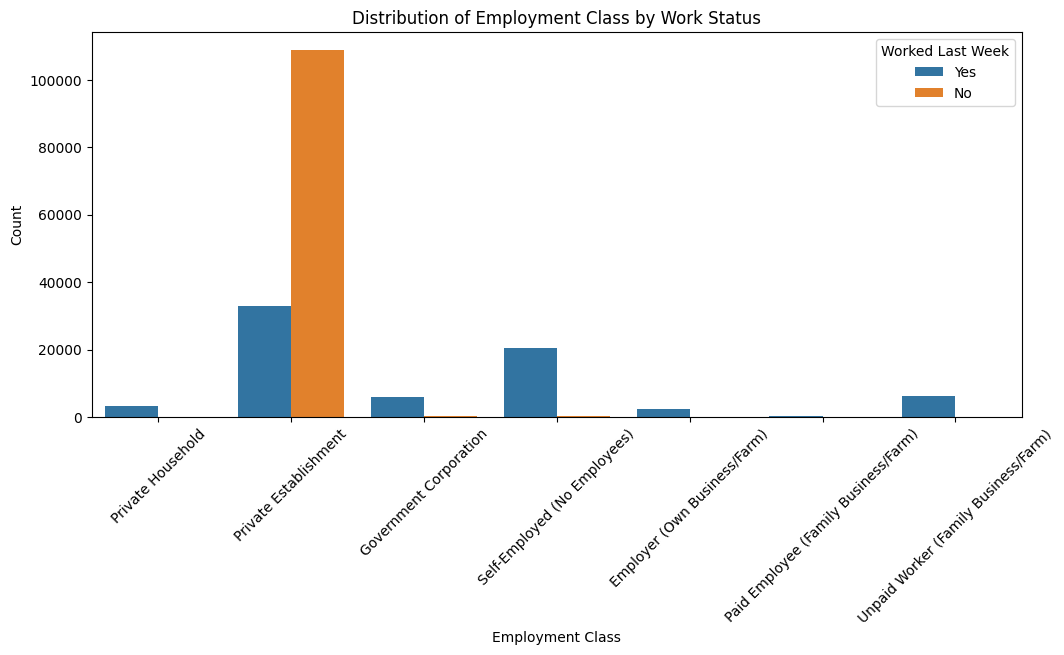

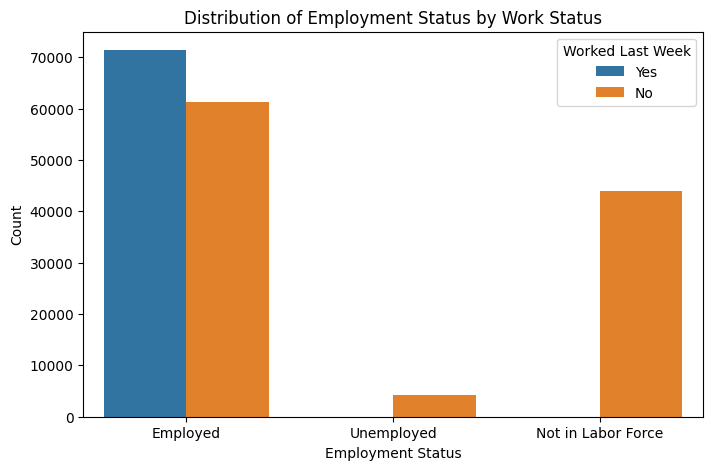

In [68]:
pclass_labels = {
    0: 'Private Household',
    1: 'Private Establishment',
    2: 'Government Corporation',
    3: 'Self-Employed (No Employees)',
    4: 'Employer (Own Business/Farm)',
    5: 'Paid Employee (Family Business/Farm)',
    6: 'Unpaid Worker (Family Business/Farm)'
}

# Define category labels for PUFNEWEMPSTAT
empstat_labels = {
    1: 'Employed',
    2: 'Unemployed',
    3: 'Not in Labor Force'
}

# Define category labels for PUFC11_WORK
work_labels = {1: 'Yes', 2: 'No'}

# Apply labels
cleaned_selected_df['PUFC23_PCLASS'] = cleaned_selected_df['PUFC23_PCLASS'].map(pclass_labels)
cleaned_selected_df['PUFNEWEMPSTAT'] = cleaned_selected_df['PUFNEWEMPSTAT'].map(empstat_labels)
cleaned_selected_df['PUFC11_WORK'] = cleaned_selected_df['PUFC11_WORK'].map(work_labels)


# Count plots
plt.figure(figsize=(12, 5))
sns.countplot(data=cleaned_selected_df, x='PUFC23_PCLASS', hue='PUFC11_WORK', order=pclass_labels.values())
plt.xticks(rotation=45)
plt.title('Distribution of Employment Class by Work Status')
plt.xlabel('Employment Class')
plt.ylabel('Count')
plt.legend(title='Worked Last Week')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=cleaned_selected_df, x='PUFNEWEMPSTAT', hue='PUFC11_WORK', order=empstat_labels.values())
plt.title('Distribution of Employment Status by Work Status')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.legend(title='Worked Last Week')
plt.show()


For `PUFC23_PCLASS` a significant portion of the respondents are classified under working for a Private Establishment. A large number of them did not work for the past week, but majority of those that did work for the past week is still woked under a private establishment with the government corporation coming to a second. In the countplot of `PUFNEWEMPSTAT`, we can see that most of the respondents are actually employed but a good number of them did not work during the past week. A significant portion of them however were also not in the labor force which could mean that they are still students or are retired. 

                       count       mean        std   min   25%   50%   75%  \
PUFNEWEMPSTAT                                                                
Employed            132692.0  25.106043  19.247276   0.0   8.0  22.0  40.0   
Not in Labor Force   43877.0  36.190168  20.768715  15.0  18.0  28.0  52.0   
Unemployed            4293.0  29.096902  11.651927  15.0  21.0  25.0  34.0   

                     max  
PUFNEWEMPSTAT             
Employed            99.0  
Not in Labor Force  99.0  
Unemployed          78.0  


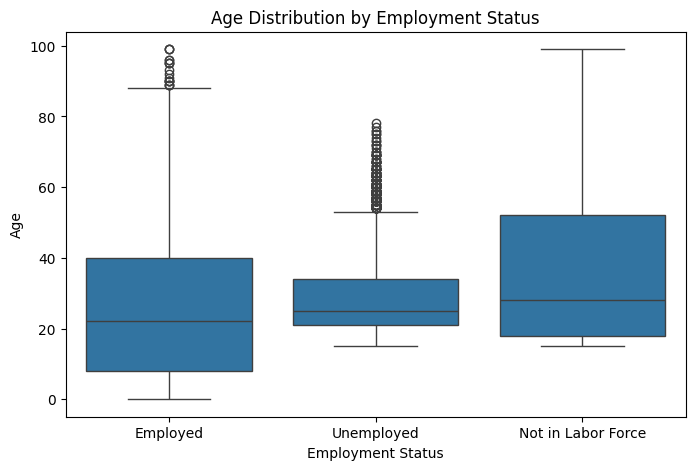

In [69]:
print(cleaned_selected_df.groupby('PUFNEWEMPSTAT')['PUFC05_AGE'].describe())

plt.figure(figsize=(8, 5))
sns.boxplot(data=cleaned_selected_df, x='PUFNEWEMPSTAT', y='PUFC05_AGE', order=['Employed', 'Unemployed', 'Not in Labor Force'])
plt.title('Age Distribution by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Age')
plt.show()

Moving on to the next category we have job-seeking & work availability: `PUFC20_PWMORE` and `PUFC21_PLADDW`. 
- `PUFC20_PWMORE` is an integer value that indicates if the respondent wants more hours of work during the past week. 
- `PUFC21_PLADDW` is an integer value representing whether the respondent looked for additional work during the past week.

Given that `PUFC20_PWMORE` and `PUFC21_PLADDW` are both categorical variables (1 = Yes, 2 = No) alongside `PUFC11_WORK`, a count plot was used to visualize how these factors relate to employment status for the past week `PUFC11_WORK`.

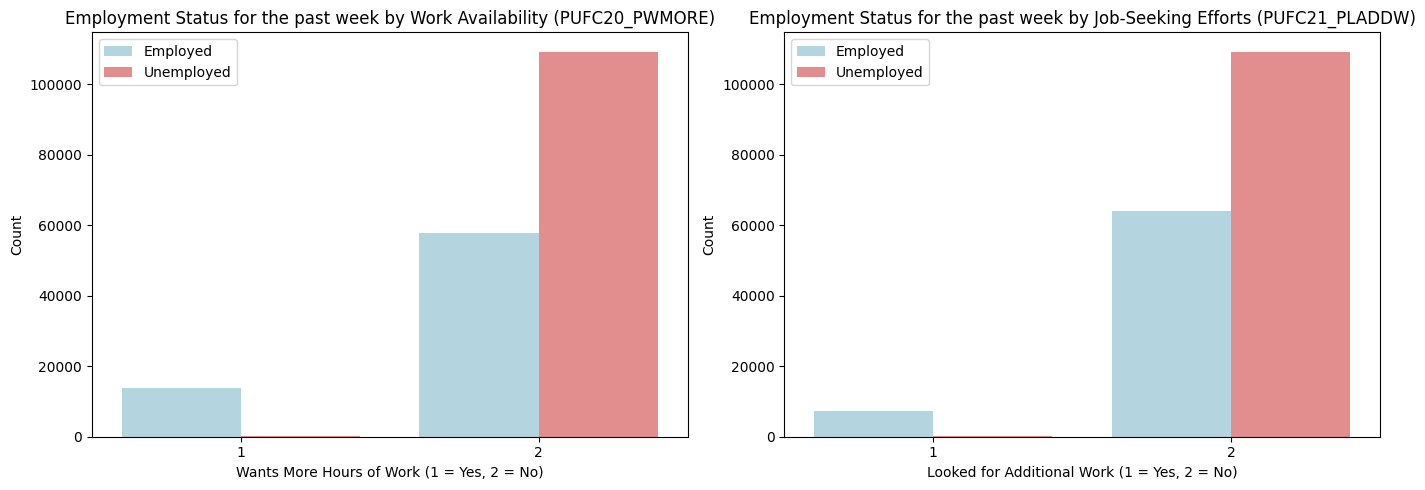

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

#Work Availability by Employment Status for the past week
sns.countplot(data=cleaned_selected_df, x="PUFC20_PWMORE", hue="PUFC11_WORK", palette=["lightblue", "lightcoral"], ax=axes[0])
axes[0].set_title("Employment Status for the past week by Work Availability (PUFC20_PWMORE)")
axes[0].set_xlabel("Wants More Hours of Work (1 = Yes, 2 = No)")
axes[0].set_ylabel("Count")
axes[0].legend(["Employed", "Unemployed"])

#Job-Seeking by Employment Status for the past week
sns.countplot(data=cleaned_selected_df, x="PUFC21_PLADDW", hue="PUFC11_WORK", palette=["lightblue", "lightcoral"], ax=axes[1])
axes[1].set_title("Employment Status for the past week by Job-Seeking Efforts (PUFC21_PLADDW)")
axes[1].set_xlabel("Looked for Additional Work (1 = Yes, 2 = No)")
axes[1].set_ylabel("Count")
axes[1].legend(["Employed", "Unemployed"])

plt.tight_layout()
plt.show()


 We can see that in the count plot to the right, employed respondents during the past week have a a significantly higher desire to get more work than unemplyoed respondents during the past week. Additionally, a significant amount of unemployed respondents during the past week do not want more work as opposed to employed respondents. The same case is seen in the count plot to the left as more employed respondents during the past week has taken the initiative to look for more work while more unemployred respondents do not try. 

To further gain more insights, a contingency table (crosstab) heatmap will be made to help visualize relationships between the two categorical variables, making it easier to compare across groups.

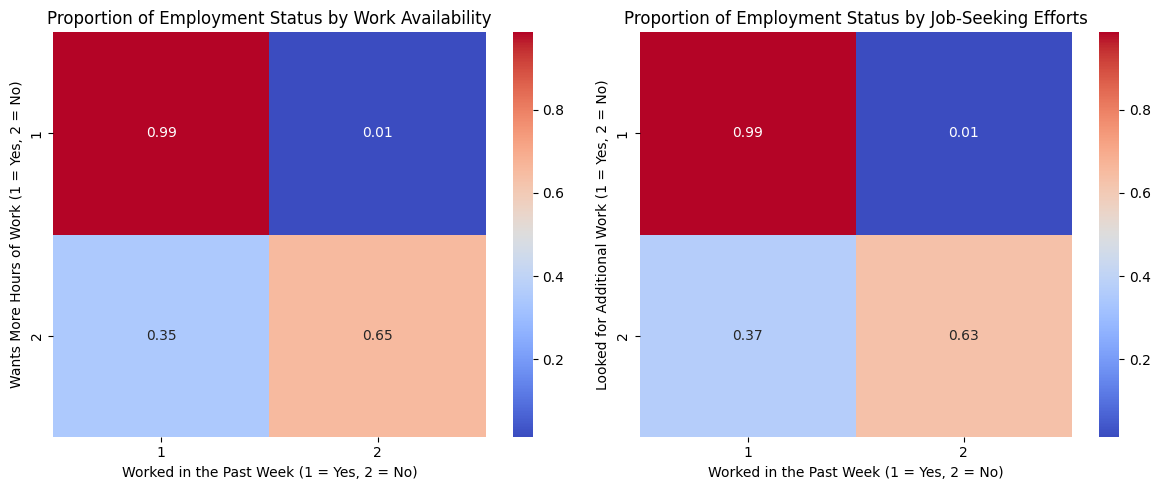

In [50]:
crosstab_pwmore = pd.crosstab(cleaned_selected_df["PUFC20_PWMORE"], cleaned_selected_df["PUFC11_WORK"], normalize="index")
crosstab_pladdw = pd.crosstab(cleaned_selected_df["PUFC21_PLADDW"], cleaned_selected_df["PUFC11_WORK"], normalize="index")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(crosstab_pwmore, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[0])
axes[0].set_title("Proportion of Employment Status by Work Availability")
axes[0].set_xlabel("Worked in the Past Week (1 = Yes, 2 = No)")
axes[0].set_ylabel("Wants More Hours of Work (1 = Yes, 2 = No)")

sns.heatmap(crosstab_pladdw, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1])
axes[1].set_title("Proportion of Employment Status by Job-Seeking Efforts")
axes[1].set_xlabel("Worked in the Past Week (1 = Yes, 2 = No)")
axes[1].set_ylabel("Looked for Additional Work (1 = Yes, 2 = No)")

plt.tight_layout()
plt.show()

The contingency table (crosstab) heatmap further gives us insight into the relationship between employment status during the past week `PUFC11_WORK` and the two variables`PUFC20_PWMORE` and `PUFC21_PLADDW`. 

Take note: Dark red indicates a Higher proportion (strong relationship) while dark blue indicates a Lower proportion (weak relationship). 

On the left heatmap, these are the following takeaways:
- 99% of people who want more work are employed (top-left red cell)
- Only 1% of those who want more work are unemployed (top-right blue cell).
- Among those who don’t want more work, 65% are unemployed, while 35% are employed (bottom row).
Insight: Most respondents who are actively seeking more work are already employed rather than unemployed.


On the right heatmap, these are the following takeaways:
- 99% of people who looked for additional work are employed (top-left red cell).
- Only 1% of job-seekers are unemployed (top-right blue cell).
- Among those who did not look for extra work, 63% are unemployed, while 37% are employed (bottom row).
Insight: The majority of job-seeking behavior is coming from those already employed, rather than the unemployed.

Therefore we can conclude that:
- Employment does not prevent job-seeking behavior as a number of employed individuals still seek more work.
- Unemployed individuals are less likely to look for additional work compared to the employed.
- Most job seekers and those wanting extra work are already in the workforce rather than unemployed.

Finally, we have the last category which is the work history & previous employment: `PUFC38_PREVJOB`, `PUFC41_WQTR`, and `PUFC43_QKB`. With `PUFC38_PREVJOB` and `PUFC41_WQTR` also being categorical variables the contingency table (crosstab) heatmap will be used.
- `PUFC38_PREVJOB`: An integer value indicating whether the respondent has worked before. (1=Yes and 2=No)
- `PUFC41_WQTR`: An integer value indicating whether the respondent has worked at all or business during the past quarter. (1=Yes and 2=No)
- `PUFC43_QKB`: An integer value value representing the respondent's kind of business for the past quarter. It is a categorical value. (No legend provided)

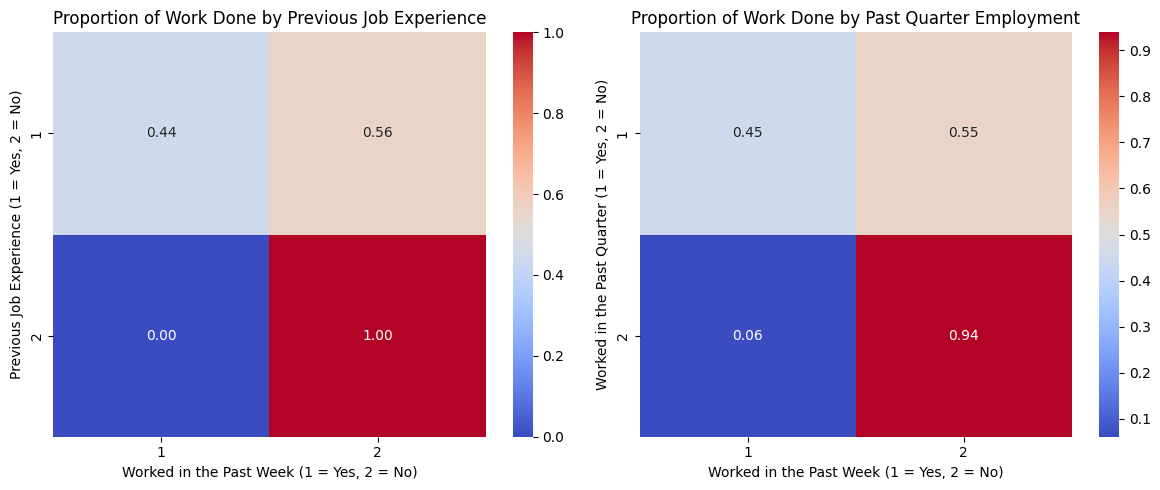

In [51]:
# Compute crosstab analyses
crosstab_prevjob = pd.crosstab(cleaned_selected_df["PUFC38_PREVJOB"], cleaned_selected_df["PUFC11_WORK"], normalize="index")
crosstab_wqtr = pd.crosstab(cleaned_selected_df["PUFC41_WQTR"], cleaned_selected_df["PUFC11_WORK"], normalize="index")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Heatmap for Previous Job Experience vs. Work Done
sns.heatmap(crosstab_prevjob, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[0])
axes[0].set_title("Proportion of Work Done by Previous Job Experience")
axes[0].set_xlabel("Worked in the Past Week (1 = Yes, 2 = No)")
axes[0].set_ylabel("Previous Job Experience (1 = Yes, 2 = No)")

# Heatmap for Past Quarter Employment vs. Work Done
sns.heatmap(crosstab_wqtr, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1])
axes[1].set_title("Proportion of Work Done by Past Quarter Employment")
axes[1].set_xlabel("Worked in the Past Week (1 = Yes, 2 = No)")
axes[1].set_ylabel("Worked in the Past Quarter (1 = Yes, 2 = No)")

# Adjust layout and show plot
plt.tight_layout()
plt.show()


The heatmaps show the relationship between previous job experience (PUFC38_PREVJOB), past quarter employment (PUFC41_WQTR), and whether an individual worked in the past week (PUFC11_WORK).

On the left heatmap, these are the following takeaways:
- 56% of individuals with previous job experience (PUFC38_PREVJOB = 1) worked in the past week (PUFC11_WORK = 2).
- 44% of those with previous job experience did not work in the past week (PUFC11_WORK = 1).
- 100% of individuals with no previous job experience (PUFC38_PREVJOB = 2) did not work in the past week.
Insight: Having prior job experience significantly increases the likelihood of working in the past week (or currently).

On the right heatmap, these are the following takeaways:
- 55% of those who were employed in the past quarter (PUFC41_WQTR = 1) worked in the past week.
- 45% of them did not work in the past week.
- 94% of individuals who were NOT employed in the past quarter (PUFC41_WQTR = 2) did NOT work in the past week.
Insight: Being employed in the past quarter increases the chances of working in the past week, but there is still a portion (45%) who did not work.

With this we can conclude that:
- Prior job experience plays a crucial role in current employment—those without previous job experience have a very low probability of working in the past week.
- Recent employment history (past quarter) strongly influences work status, but there is still some room for fluctuations (not all employed in the past quarter are currently working).
- The strongest factor appears to be previous job experience, as having a prior job experience strongly influences the likelihood fo the respondent to work during the past week (or even as of currently).



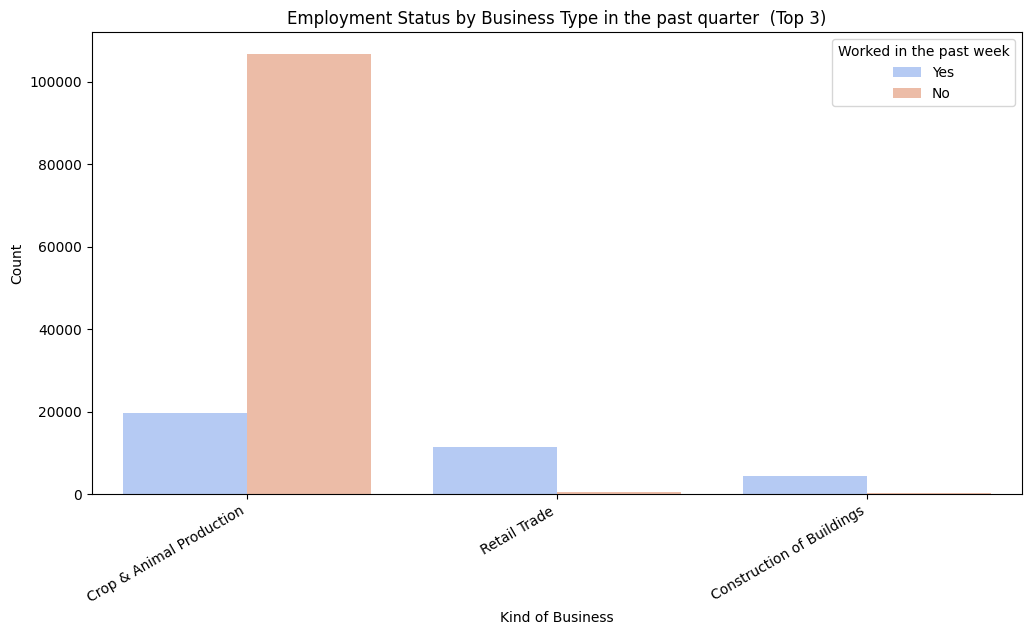

In [70]:
business_labels = {
    1: "Crop & Animal Production",
    47: "Retail Trade",
    41: "Construction of Buildings"
}

# Get the top 3 most common business types
top_3_business = cleaned_selected_df['PUFC43_QKB'].value_counts().nlargest(3).index

filtered_df = cleaned_selected_df[cleaned_selected_df['PUFC43_QKB'].isin(top_3_business)].copy()
filtered_df['PUFC43_QKB'] = filtered_df['PUFC43_QKB'].map(business_labels)
filtered_df['PUFC11_WORK'] = filtered_df['PUFC11_WORK'].replace({-1: 'Yes', -2: 'No'})
top_3_business_labels = [business_labels[val] for val in top_3_business]

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x='PUFC43_QKB', hue='PUFC11_WORK', palette='coolwarm', order=top_3_business_labels)
plt.xlabel('Kind of Business')
plt.ylabel('Count')
plt.title('Employment Status by Business Type in the past quarter  (Top 3)')
plt.legend(title='Worked in the past week')
plt.xticks(rotation=30, ha='right')  
plt.show()


`PUFC43_QKB` has Crop and Animal Production, Hunting and Related Services Activities business type with the largest number of people overall, but most of them did not work in the past week.


## **Section 6. Initial model training**

### **Binomial Logistic Regression**


In this section, we will make and train a logistic regression model using sklearn's `SGDClassifier`.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

In [54]:
# Load dataset
file_path = "PHL-PSA-LFS-2016-Q2-PUF/LFS PUF April 2016.CSV"
df = pd.read_csv(file_path)

The PUFC11_WORK column has three unique values:

`2`: 87,556 occurrences

`1`: 71,412 occurrences

Blank values: 21,894 entries (likely missing data)

* `1` and `2` likely indicate whether the person worked last week (`1 = Yes`, `2 = No`).

* Missing values may correspond to individuals not applicable for this question.

In [55]:
# Preprocess PUFC11_WORK (Target Variable)
df["PUFC11_WORK"] = df["PUFC11_WORK"].astype(str).str.strip()
df = df[df["PUFC11_WORK"] != ""] 
df["PUFC11_WORK"] = df["PUFC11_WORK"].astype(int)
df["PUFC11_WORK"] = df["PUFC11_WORK"].apply(lambda x: 1 if x == 1 else 0)

The `PUFC11_WORK` column, which indicates whether an individual worked last week, needed to be cleaned and converted into a binary format suitable for logistic regression. First, the column was converted to a string type and stripped of any leading or trailing spaces to ensure consistency. Next, rows where `PUFC11_WORK` had missing values (blanks) were removed to prevent issues during model training. The remaining values, originally encoded as `1` (Worked) and `2` (Did not work), were converted into a binary format where `1` remained the same and `2` was mapped to `0`. This transformation ensures that the target variable aligns with a standard binary classification setup, where `1` represents the positive class (worked last week) and `0` represents the negative class (did not work last week).

 Select relevant predictor variables for logistic regression that might affect employment status.

* `PUFHHSIZE`: Household size
* `PUFC04_SEX`: Sex
* `PUFC05_AGE`: Age
* `PUFC06_MSTAT`: Marital status
* `PUFC07_GRADE`: Highest grade completed
* `PUFC08_CURSCH`: Currently in school
* `PUFC09_GRADTECH`: Graduated from technical school

These variables cover demographics, education, and household characteristics, which are likely to influence employment.

In [56]:
# Select Relevant Features
selected_features = ["PUFHHSIZE", "PUFC04_SEX", "PUFC05_AGE", "PUFC06_MSTAT", 
                     "PUFC07_GRADE", "PUFC08_CURSCH", "PUFC09_GRADTECH"]

In [57]:
# Convert categorical variables to string (for one-hot encoding)
for col in selected_features:
    if df[col].dtype == "object":
        df[col] = df[col].astype(str)

This ensures that the categorical variables are treated as strings before encoding. And it helps avoid issues when applying one-hot encoding. One-hot encoding converts categorical variables into binary columns.

In [58]:
# Apply one-hot encoding
df_encoded = pd.get_dummies(df[selected_features], drop_first=True)

In [59]:
# Re-adds the target variable (PUFC11_WORK) to the encoded dataset.
df_encoded["PUFC11_WORK"] = df["PUFC11_WORK"]

To prepare for model training, the dataset is divided into features (`X`) and the target variable (`y`). The target variable, `PUFC11_WORK`, is removed from `X`, ensuring that only predictor variables remain. The data is then split into an **80%** training set and a **20%** test set using `train_test_split()`, with stratification to maintain the same proportion of employed and unemployed individuals in both subsets.

Since the dataset is large and training on the entire set could cause memory issues, a random subset of **20,000** samples is selected from the training set. This ensures that the model can be trained efficiently without excessive memory consumption.

In [60]:
# Split data (use a smaller subset for training to avoid memory issues)
X = df_encoded.drop(columns=["PUFC11_WORK"])
y = df_encoded["PUFC11_WORK"]

# Reduce training size for efficiency
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
X_train_sample, y_train_sample = X_train.sample(n=20000, random_state=1), y_train.sample(n=20000, random_state=1)

# Print dataset split details
print(f"Training set: {len(X_train)} samples (80%)\n")
print(f"Test set: {len(X_test)} samples (20%)\n")

Training set: 127174 samples (80%)

Test set: 31794 samples (20%)



A logistic regression model is trained using **stochastic gradient descent (SGD)** via `SGDClassifier`. Unlike traditional logistic regression, SGDClassifier processes the dataset in smaller batches, making it more memory-efficient for large datasets. The model is configured with `loss='log_loss'`, which specifies logistic regression as the loss function. It is trained for a maximum of 200 iterations, using a constant learning rate of **0.001**, ensuring a gradual and stable learning process.

In [61]:
# Train Logistic Regression using SGDClassifier
model = SGDClassifier(loss='log_loss', max_iter=200, learning_rate='constant', eta0=0.001, random_state=1)
model.fit(X_train_sample, y_train_sample)

SGDClassifier(eta0=0.001, learning_rate='constant', loss='log_loss',
              max_iter=200, random_state=1)

Once the model is trained, it is used to predict employment status for the test set. The predicted values are compared against the actual employment labels, and the accuracy score is calculated. A classification report is also generated, which provides precision, recall, and F1-score for both classes (worked vs. did not work). This evaluation helps determine how well the model generalizes to new, unseen data. The accuracy score is displayed, along with a breakdown of the model’s performance in distinguishing between employed and unemployed individuals.

In [62]:
# Predictions and Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [63]:
# Print results
print(f"Test Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)


Test Accuracy: 0.7570
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78     17511
           1       0.74      0.72      0.73     14283

    accuracy                           0.76     31794
   macro avg       0.75      0.75      0.75     31794
weighted avg       0.76      0.76      0.76     31794



To understand the distribution of employment status, a scatter plot is generated, mapping **Age vs. Household Size** from the training dataset. Each data point is colored based on whether the individual worked last week (`PUFC11_WORK`), with a coolwarm color map distinguishing between those who worked (red) and those who did not (blue). This visualization provides insight into patterns, such as whether younger individuals or those in larger households are more or less likely to be employed.

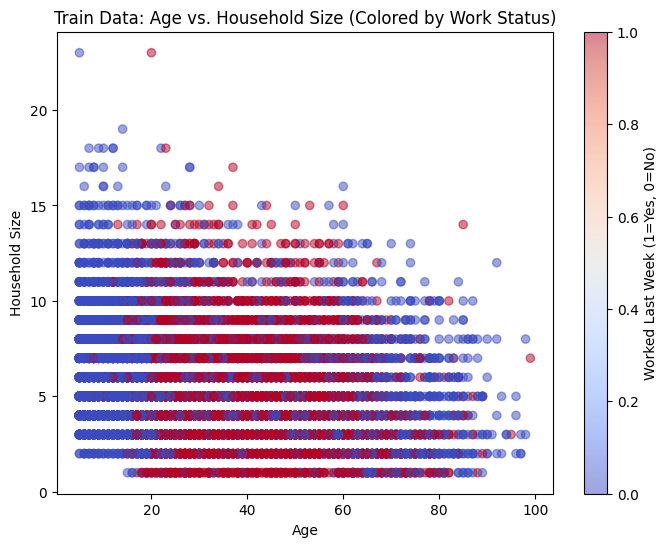

In [64]:
# Visualization: Age vs. Household Size (Train Data)
plt.figure(figsize=(8, 6))
plt.scatter(X_train_sample["PUFC05_AGE"], X_train_sample["PUFHHSIZE"], c=y_train_sample, alpha=0.5, cmap="coolwarm")
plt.xlabel("Age")
plt.ylabel("Household Size")
plt.title("Train Data: Age vs. Household Size (Colored by Work Status)")
plt.colorbar(label="Worked Last Week (1=Yes, 0=No)")
plt.show()

The Age vs. Household Size scatter plot was chosen because these two features are likely to have an impact on employment status, and they provide an intuitive way to visualize patterns in the data. Here’s why these specific variables were selected:

1. **Age** (`PUFC05_AGE`)

    * Age is one of the strongest predictors of employment.

    * Younger individuals (e.g., students) and older individuals (e.g., retirees) might have different employment rates compared to those in their prime working years (20-50 years old).

    * This variable can help reveal whether employment likelihood follows a certain age trend.

2. **Household Size** (`PUFHHSIZE`)

    * Household size can impact employment decisions, especially in economies where family support plays a role in financial decisions.

    * Individuals in larger households might be less likely to work if they have financial support from other family members.

    * Conversely, those in smaller households may have more financial responsibility, making them more likely to be employed.

**Why Visualize These Two Together?**
* A 2D scatter plot requires two numerical variables for meaningful visualization.

* While many categorical features (e.g., education, marital status) also influence employment, they are better suited for statistical analysis rather than direct plotting.

* By plotting Age vs. Household Size and coloring points by employment status, we can observe any underlying trends or clusters in the dataset.

## **Section 7. Error analysis**

Perform error analysis on the output of all models used in the project. In this section of the
notebook, you should:
* Report and properly interpret the initial performance of all models using appropriate
evaluation metrics.
* Identify difficult classes and/or instances. For classification tasks, these are classes
and/or instances that are difficult to classify. Hint: You may use confusion matrix for
this. For regression tasks, these are instances that produces high error.

#### **Error Analysis for Binomial Logistic Regression**


Initial Model Performance Using Evaluation Metrics
The logistic regression model trained using `SGDClassifier` achieved the following results on the test set:

- **Test Accuracy**: **0.7570 (75.7%)**
- **Precision & Recall**:
  - **Class 0 (Did not work last week)**: Precision = 0.77, Recall = 0.79, F1-score = 0.78
  - **Class 1 (Worked last week)**: Precision = 0.74, Recall = 0.72, F1-score = 0.73
- **Macro Average**:
  - Precision = 0.75, Recall = 0.75, F1-score = 0.75
- **Weighted Average**:
  - Precision = 0.76, Recall = 0.76, F1-score = 0.76

Interpretation:
- The accuracy of **75.7%** suggests that the model is reasonably effective at classifying employment status.
- Precision and recall values are slightly higher for **Class 0 (Did not work last week)** than for **Class 1 (Worked last week)**, indicating that the model is better at predicting unemployed individuals.
- The F1-score values (0.78 for Class 0, 0.73 for Class 1) show that while both classes are classified with moderate success, there is a slight imbalance in predictive performance.

Identifying Difficult Classes & Instances
A **confusion matrix** helps visualize misclassification patterns.

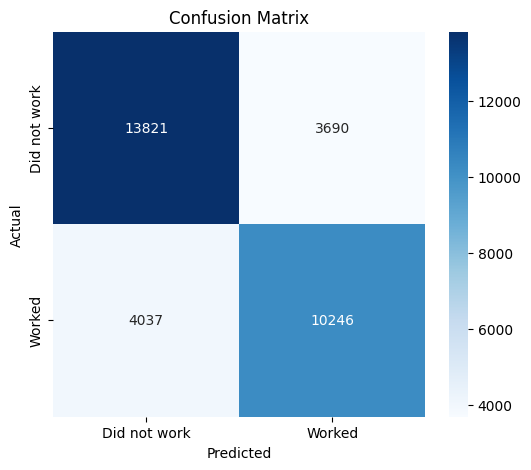

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Compute confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Did not work", "Worked"], yticklabels=["Did not work", "Worked"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Misclassified Cases Breakdown

- **Higher False Negatives for Employed (Class 1)**: The recall for **Class 1 (Worked last week)** is **0.72**, meaning **28% of employed individuals were misclassified as unemployed**.
- **Potential False Positives for Unemployed (Class 0)**: With a precision of **0.77**, **23% of instances predicted as unemployed were actually employed**.

Difficult instances are likely:
- Individuals who **worked irregular hours** or had **seasonal jobs**, making classification uncertain.
- Individuals **actively seeking work** (PUFC21_PLADDW = 1) but not officially classified as "employed" yet.
- Younger individuals **currently in school (PUFC08_CURSCH = 1)** who may work part-time.

In [66]:
# Find misclassified instances
misclassified_idx = np.where(y_test != y_pred)[0]
misclassified_cases = X_test.iloc[misclassified_idx]
misclassified_cases["Actual"] = y_test.iloc[misclassified_idx]
misclassified_cases["Predicted"] = y_pred[misclassified_idx]

# Display first few misclassified cases
print(misclassified_cases.head())


        PUFHHSIZE  PUFC04_SEX  PUFC05_AGE  PUFC06_MSTAT_2  PUFC06_MSTAT_3  \
174073          3           2          20            True           False   
111528          5           2          48            True           False   
53028           7           1          69            True           False   
33179           5           2          32            True           False   
139908          5           2          43            True           False   

        PUFC06_MSTAT_4  PUFC06_MSTAT_5  PUFC06_MSTAT_6  PUFC07_GRADE_010  \
174073           False           False           False             False   
111528           False           False           False             False   
53028            False           False           False             False   
33179            False           False           False             False   
139908           False           False           False             False   

        PUFC07_GRADE_210  ...  PUFC07_GRADE_820  PUFC07_GRADE_830  \
174073     

C:\Users\JN\AppData\Local\Temp\ipykernel_26900\2846025784.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  misclassified_cases["Actual"] = y_test.iloc[misclassified_idx]
C:\Users\JN\AppData\Local\Temp\ipykernel_26900\2846025784.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  misclassified_cases["Predicted"] = y_pred[misclassified_idx]


## **Section 8. Improving model performance**

Perform grid search or random search to tune the hyperparameters of each model. You should
also tune each model to reduce the error in difficult classes and/or instances. In this section of
the notebook, please take note of the following:
* Make sure to elaborately explain the method of hyperparameter tuning.
* Explicitly mention the different hyperparameters and their range of values. Show the
corresponding performance of each configuration.
* Report the performance of all models using appropriate evaluation metrics and
visualizations.
* Properly interpret the result based on relevant evaluation metrics.


## **Section 9. Model performance summary**

## **Section 10. Insights and conclusions**

## **Section 11. References**